In [1]:
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np

import cartopy.crs as crs


from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.feature as cfe

import pandas as pd


import matplotlib.pyplot as plt



from cartopy.feature import NaturalEarthFeature

import cartopy.io.shapereader as shpr

import cartopy.io.img_tiles as cimgt

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

from matplotlib.cm import get_cmap
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import imageio

In [2]:
stamen_terrain = cimgt.Stamen('terrain-background')

states = NaturalEarthFeature(category="cultural", scale="10m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
roads = NaturalEarthFeature(category='cultural',
                                     name='roads',
                                     scale='10m',
                                     facecolor='none')

# Dirección y velocidad del viento
## Función para hacer las animaciones de la dirección y velocidad del viento

In [3]:
def gif_viento(dominio):
    ncfile = Dataset('wrfout_d{}_2021-05-11_00:00:00'.format(dominio))

    for i in range(0, 169):

        ua = getvar(ncfile, "uvmet10", units="kt",timeidx=i)[0,:]
        va = getvar(ncfile, "uvmet10", units="kt",timeidx=i)[1,:]
        wspd = getvar(ncfile, "wspd_wdir10", units="kt",timeidx=i)[0,:]



        # Get the lat/lon coordinates
        lats, lons = latlon_coords(wspd)

        # Get the map projection information
        cart_proj = get_cartopy(wspd)

        # Create the figure
        fig = plt.figure(figsize=(12,9))
        ax = plt.axes(projection=cart_proj)


        # Add the wind speed contours
        levels = [j for j in range(0,36, 6)]
        wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd),
                                     levels=levels,
                                     cmap=get_cmap("jet"),
                                     transform=crs.PlateCarree())
        plt.colorbar( wspd_contours,ax=ax, orientation="horizontal", pad=.1)

        # Add the 500 hPa wind barbs, only plotting every 125th data point.
        plt.barbs(to_np(lons[::5,::5]), to_np(lats[::5,::5]),to_np(ua[::5, ::5]), to_np(va[::5, ::5]),transform=crs.PlateCarree(), length=4,color="white")

        # Set the map bounds
        ax.set_xlim(cartopy_xlim(wspd))
        ax.set_ylim(cartopy_ylim(wspd))

        ax.add_feature(roads, edgecolor="black" ,linewidth=0.5)
        ax.add_feature(states, linewidth=.7, edgecolor="black")

        ax.gridlines()

        ax.add_feature(states, linewidth=0.5, edgecolor="black")
        ax.coastlines('50m', linewidth=0.8)
        
        dia = int(i*3/24)
        hora =i*3 - dia*24
        
        plt.title("10 M de Altura, Velocidad del viento (kt), Barras de viento (kt) \n Dia {} Hora {}:00:00".format(dia+11,hora))

        plt.savefig('figs/d{}/viento/d{}_viento_{}.png'.format(dominio,dominio,i))
        plt.close(fig)


    with imageio.get_writer('figs/d{}/d{}_viento.gif'.format(dominio,dominio), mode='I') as writer:
        for i in range(0,169):
            filename = 'figs/d{}/viento/d{}_viento_{}.png'.format(dominio,dominio,i)
            image = imageio.imread(filename)
            writer.append_data(image)

## Dominio 1

In [14]:
gif_viento("01")

<img src="figs/d01/d01_viento.gif" />

## Dominio 2

In [15]:
gif_viento("02")

<img src="figs/d02/d02_viento.gif" />

## Dominio 3


In [16]:
gif_viento("03")

<img src="figs/d03/d03_viento.gif" />

In [6]:
def gif_viento_3_doms(fichero):
    ncfile_01 = Dataset(fichero[0])
    ncfile_02 = Dataset(fichero[1])
    ncfile_03 = Dataset(fichero[2])

    for i in range(0,169):

        

        # Crear la figura para mostrarlo
        fig = plt.figure(figsize=(15, 6))
        
        levels =[j for j in range(0,36, 2)]
        #Ciudad de Madrid
        ua = getvar(ncfile_03, "uvmet10", units="kt",timeidx=i)[0,:]
        va = getvar(ncfile_03, "uvmet10", units="kt",timeidx=i)[1,:]
        wspd = getvar(ncfile_03, "wspd_wdir10", units="kt",timeidx=i)[0,:]
        
        #Para leer la proyección en la que se ha hecho
        cart_proj = get_cartopy(ua)
        
        # Para leer la latitud y la longitud
        lats, lons = latlon_coords(ua)
        
        ax = fig.add_subplot(1, 5, (1,4), projection=cart_proj)
        # Set the map bounds
        ax.set_xlim(cartopy_xlim(ua))
        ax.set_ylim(cartopy_ylim(ua))
        
        ax.set_title('Velocidad del viento (kt) en Madrid \n Día {} Hora {}:00:00'.format(int(i/24)+11,(i-int(i/24)*24)), fontsize=16)
        ax.coastlines('50m', linewidth=0.8)
    
        #Para hacer el contorno de los puntos que tienen misma presión
        wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd),
                                     levels=levels,
                                     cmap=get_cmap("jet"),
                                     transform=crs.PlateCarree())
        plt.colorbar( wspd_contours,ax=ax, orientation="horizontal", pad=.1)

        # Add the 500 hPa wind barbs, only plotting every 125th data point.
        plt.barbs(to_np(lons[::5,::5]), to_np(lats[::5,::5]),to_np(ua[::5, ::5]), to_np(va[::5, ::5]),transform=crs.PlateCarree(), length=6,color="white")
        
        #Añadir caracteristicas
        ax.add_feature(roads, edgecolor="black" ,linewidth=0.5)
        ax.add_feature(states, linewidth=.7, edgecolor="black")

        ax.gridlines()

        ax.add_feature(states, linewidth=0.5, edgecolor="black")
        ax.coastlines('50m', linewidth=0.8)

        
        
        
        # Comunidad de Madrid
        
        
        ax_2 = fig.add_subplot(2, 5, 5,projection=cart_proj)
        
        
        ua = getvar(ncfile_02, "uvmet10", units="kt",timeidx=i)[0,:]
        va = getvar(ncfile_02, "uvmet10", units="kt",timeidx=i)[1,:]
        wspd = getvar(ncfile_02, "wspd_wdir10", units="kt",timeidx=i)[0,:]
        
        #Para leer la proyección en la que se ha hecho
        cart_proj = get_cartopy(ua)
        
        # Para leer la latitud y la longitud
        lats, lons = latlon_coords(ua)

        # Set the map bounds
        ax_2.set_xlim(cartopy_xlim(ua))
        ax_2.set_ylim(cartopy_ylim(ua))
        
        ax_2.set_title('Comunidad de Madrid'.format(int(i/24)+11,(i-int(i/24)*24)), fontsize=16)
        ax_2.coastlines('50m', linewidth=0.8)
    
        #Para hacer el contorno de los puntos que tienen misma presión
        wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd),
                                     levels=levels,
                                     cmap=get_cmap("jet"),
                                     transform=crs.PlateCarree())
       

        #Añadir caracteristicas
        ax_2.add_feature(roads, edgecolor="black" ,linewidth=0.5)
        ax_2.add_feature(states, linewidth=.7, edgecolor="black")

        ax_2.gridlines()

        ax_2.add_feature(states, linewidth=0.5, edgecolor="black")
        ax_2.coastlines('50m', linewidth=0.8)
        
        
        
        
        #España
        
        ax_1 = fig.add_subplot(2, 5, 10, projection=cart_proj)
        
        ua = getvar(ncfile_01, "uvmet10", units="kt",timeidx=i)[0,:]
        va = getvar(ncfile_01, "uvmet10", units="kt",timeidx=i)[1,:]
        wspd = getvar(ncfile_01, "wspd_wdir10", units="kt",timeidx=i)[0,:]
        
        #Para leer la proyección en la que se ha hecho
        cart_proj = get_cartopy(ua)
        lats, lons = latlon_coords(ua)
        
        # Para leer la latitud y la longitud
        lats, lons = latlon_coords(ua)

        # Set the map bounds
        ax_1.set_xlim(cartopy_xlim(ua))
        ax_1.set_ylim(cartopy_ylim(ua))
        
        ax_1.set_title('España'.format(int(i/24)+11,(i-int(i/24)*24)), fontsize=16)
        ax_1.coastlines('50m', linewidth=0.8)
    
        #Para hacer el contorno de los puntos que tienen misma presión
        wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd),
                                     levels=levels,
                                     cmap=get_cmap("jet"),
                                     transform=crs.PlateCarree())
       

        #Añadir caracteristicas
        ax_1.add_feature(roads, edgecolor="black" ,linewidth=0.5)
        ax_1.add_feature(states, linewidth=.7, edgecolor="black")

        ax_1.gridlines()

        ax_1.add_feature(states, linewidth=0.5, edgecolor="black")
        ax_1.coastlines('50m', linewidth=0.8)

        

        
        plt.savefig('figs/viento/viento_{}.png'.format(i))
        #Para que no se muestren las imágenes
        plt.close(fig)
    with imageio.get_writer('figs/viento.gif', mode='I') as writer:
            for i in range(0,169):
                for j in range(0,3):
                    filename = 'figs/viento/viento_{}.png'.format(i)
                    image = imageio.imread(filename)
                    writer.append_data(image)    

In [7]:
gif_viento_3_doms(['wrfout_d01_2021-05-11_00:00:00',
                        'wrfout_d02_2021-05-11_00:00:00',
                        'wrfout_d03_2021-05-11_00:00:00'])

<img src="figs/viento.gif"/>

NameError: name 'presion_cross' is not defined

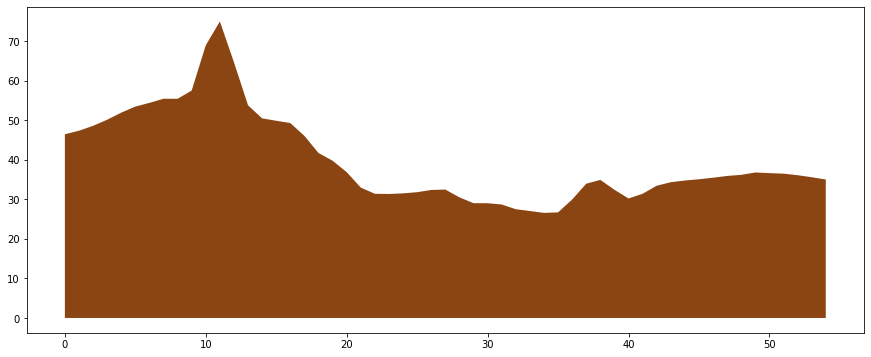

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)

# Open the NetCDF file
filename = 'wrfout_d02_2021-05-11_00:00:00'
ncfile = Dataset(filename)

z = getvar(ncfile, "z",timeidx=0)
lats, lons = latlon_coords(z)

a=[[float(j) for j  in i] for  i in lats]
lat_init, lat_fin = max([max(i) for i in a]),min([min(i) for i in a])
start_point = CoordPair(lat=lat_init, lon=-3.6)
end_point = CoordPair(lat= lat_fin, lon=-3.6)
ter = getvar(ncfile, "ter")


for i in range(0,169):
    # Extraer del modelo las variables que vamosa  usar
    z = getvar(ncfile, "z",units = "m",timeidx=i)[:16]
    vel = getvar(ncfile, "uvmet_wspd_wdir", units="kt",timeidx = i)[0,:16]
    

    # Realizar el corte vertical a la velocidad
    vel_cross = vertcross(vel, z, wrfin=ncfile, start_point=start_point,
                           end_point=end_point, latlon=True, meta=True)

    # Crear la figura
    fig = plt.figure(figsize=(15, 6))
    

    
    #Para la subfigura 1
    ax = plt.axes()
    
    #Para mostrar el corte vertical el terreno
    #Realizar el corte vertical
    ter_line = interpline(ter, wrfin=ncfile, start_point=start_point,
                          end_point=end_point)
    #Para rellenar
    ht_fill = ax.fill_between([i for i in range(55)],0,to_np(ter_line)/20, facecolor="saddlebrown")

    # Hacer el contorno y rellenarlo con el corte vertical de la velocidad del viento
    vel_contours = ax.contourf(to_np(presion_cross),levels = [i for i in range(0,70,5)], cmap=get_cmap("jet"))

    
    # Add the color bar
    plt.colorbar(presion_contours, ax=ax)

    # Set the x-ticks to use latitude and longitude labels.
    coord_pairs = to_np(presion_cross.coords["xy_loc"])
    x_ticks = np.arange(coord_pairs.shape[0])
    x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
                for pair in to_np(coord_pairs)]
    
    ax.set_xticks(x_ticks[::20])
    ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

    # Set the y-ticks to be height.
    vert_vals = to_np(presion_cross.coords["vertical"])
    v_ticks = np.arange(vert_vals.shape[0])
    ax.set_yticks(v_ticks[::20])
    ax.set_yticklabels(vert_vals[::20], fontsize=8)

    ax.set_xlabel("Latitud", fontsize=12)
    ax.set_ylabel("Altura (m)", fontsize=12)
    ax.set_ylim([0,80])
    
    
    plt.title("Sección vertical de la presión \n Día {} Hora {}:00:00".format(i//24+11,i -i//24*24))

    plt.savefig('figs/presion_v/presion_v_{}.png'.format(i))
    #Para que no se muestren las imágenes
    plt.close(fig)
with imageio.get_writer('figs/v_vel.gif', mode='I') as writer:
            for i in range(0,169):
                for j in range(0,3):
                    filename = 'figs/presion_v/presion_v_{}.png'.format(i)
                    image = imageio.imread(filename)
                    writer.append_data(image)       

In [163]:
dominio="02"

# Open the NetCDF file
filename = 'wrfout_d{}_2021-05-11_00:00:00'.format(dominio)
ncfile = Dataset(filename)

z = getvar(ncfile, "z",timeidx=0)
lats, lons = latlon_coords(z)
a=[[float(j) for j  in i] for  i in lats]
lat_init, lat_fin = max([max(i) for i in a]),min([min(i) for i in a])
start_point = CoordPair(lat=lat_init, lon=-3.7)
end_point = CoordPair(lat= lat_fin, lon=-3.7)
ter = getvar(ncfile, "ter")
levels =[j for j in range(0,36, 2)]



for i in range(0,169):
    # Extract the model height and wind speed
    n_level = 10
    z = getvar(ncfile, "z",units = "m",timeidx=i)[: n_level]
    presion = getvar(ncfile, "uvmet_wspd_wdir", units="kt",timeidx = i)[0,:n_level]



    lats, lons = latlon_coords(z)

    # Compute the vertical cross-section interpolation.  Also, include the
    # lat/lon points along the cross-section.
    presion_cross = vertcross(presion, z, wrfin=ncfile, start_point=start_point,
                           end_point=end_point, latlon=True, meta=True)
    

    
    # Create the figure
    fig = plt.figure(figsize=(15, 15))
    
    ax = fig.add_subplot(121)
    
    #Para rellenar la altura
    # Get the terrain heights along the cross section line
    ter_line = interpline(ter, wrfin=ncfile, start_point=start_point,
                          end_point=end_point)
    #Para rellenar
    ht_fill = ax.fill_between([i for i in range(len(ter_line))],0,to_np(ter_line)/20, facecolor="saddlebrown")

    # Make the contour plot
    presion_contours = ax.contourf(to_np(presion_cross),levels = [i for i in range(0,50,5)], cmap=get_cmap("jet"))
    
    
    # Add the color bar
   


    # Set the x-ticks to use latitude and longitude labels.
    coord_pairs = to_np(presion_cross.coords["xy_loc"])
    x_ticks = np.arange(coord_pairs.shape[0])
    x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
                for pair in to_np(coord_pairs)]
    
    ax.set_xticks(x_ticks[::20])
    ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

    # Set the y-ticks to be height.
    vert_vals = to_np(presion_cross.coords["vertical"])
    v_ticks = np.arange(vert_vals.shape[0])
    ax.set_yticks(v_ticks[::20])
    ax.set_yticklabels(vert_vals[::20], fontsize=8)

    ax.set_xlabel("Latitud", fontsize=12)
    ax.set_ylabel("Altura (m)", fontsize=12)
    ax.set_ylim([0,65])
    
    
    plt.title("Sección vertical de la presión \n Día {} Hora {}:00:00".format(i//24+11,i -i//24*24))

        
    ax_2 =fig.add_subplot(1,2,2 ,projection=cart_proj)
        
        
    ua = getvar(ncfile, "uvmet10", units="kt",timeidx=i)[0,:]
    va = getvar(ncfile, "uvmet10", units="kt",timeidx=i)[1,:]
    wspd = getvar(ncfile, "wspd_wdir10", units="kt",timeidx=i)[0,:]
        
    #Para leer la proyección en la que se ha hecho
    cart_proj = get_cartopy(ua)
        
    # Para leer la latitud y la longitud
    lats, lons = latlon_coords(ua)

        # Set the map bounds
    ax_2.set_xlim(cartopy_xlim(ua))
    ax_2.set_ylim(cartopy_ylim(ua))
        
    ax_2.set_title('Comunidad de Madrid'.format(int(i/24)+11,(i-int(i/24)*24)), fontsize=16)
    ax_2.coastlines('50m', linewidth=0.8)
    
    #Para hacer el contorno de los puntos que tienen misma presión
    wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd),
                                     levels=levels,
                                     cmap=get_cmap("jet"),
                                     transform=crs.PlateCarree())
    plt.colorbar( wspd_contours, ax=ax_2)  

    #Añadir caracteristicas
    ax_2.add_feature(roads, edgecolor="black" ,linewidth=0.5)
    ax_2.add_feature(states, linewidth=.7, edgecolor="black")

    ax_2.gridlines()

    ax_2.add_feature(states, linewidth=0.5, edgecolor="black")
    ax_2.coastlines('50m', linewidth=0.8)   
    
    
    
    
    plt.savefig('figs/d{}/viento_vertical/presion_v_{}.png'.format(dominio,i))
    #Para que no se muestren las imágenes
    plt.close(fig)
with imageio.get_writer('figs/d{}/viento_vertical.gif'.format(dominio), mode='I') as writer:
            for i in range(0,169):
                for j in range(0,3):
                    filename = 'figs/d{}/viento_vertical/presion_v_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  

# Velocidad del viento

In [229]:
dominio="02"

# Open the NetCDF file
filename = 'wrfout_d{}_2021-05-11_00:00:00'.format(dominio)
ncfile = Dataset(filename)

z = getvar(ncfile, "z",timeidx=0)
lats, lons = latlon_coords(z)
a=[[float(j) for j  in i] for  i in lats]
lat_init, lat_fin = max([max(i) for i in a]),min([min(i) for i in a])
start_point = CoordPair(lat=lat_init, lon=-3.7)
end_point = CoordPair(lat= lat_fin, lon=-3.7)
ter = getvar(ncfile, "ter")
levels =[j for j in range(0,36, 2)]



for i in range(0,169):
    # Extract the model height and wind speed
    n_level = 10
    z = getvar(ncfile, "z",units = "m",timeidx=i)[: n_level]
    presion = getvar(ncfile, "uvmet_wspd_wdir", units="kt",timeidx = i)[0,:n_level]



    lats, lons = latlon_coords(z)

    # Compute the vertical cross-section interpolation.  Also, include the
    # lat/lon points along the cross-section.
    presion_cross = vertcross(presion, z, wrfin=ncfile, start_point=start_point,
                           end_point=end_point, latlon=True, meta=True)
    
    
    # Create the figure
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes()

    #Para rellenar la altura
    # Get the terrain heights along the cross section line
    ter_line = interpline(ter, wrfin=ncfile, start_point=start_point,
                          end_point=end_point)
    #Para rellenar
    ht_fill = ax.fill_between([i for i in range(len(ter_line))],0,to_np(ter_line)/20, facecolor="saddlebrown")

    # Make the contour plot
    presion_contours = ax.contourf(to_np(presion_cross),levels = [i for i in range(0,50,5)], cmap=get_cmap("jet"))
    
    

    # Set the x-ticks to use latitude and longitude labels.
    coord_pairs = to_np(presion_cross.coords["xy_loc"])
    x_ticks = np.arange(coord_pairs.shape[0])
    x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
                for pair in to_np(coord_pairs)]
    plt.colorbar(presion_contours, ax=ax) 
    
    ax.set_xticks(x_ticks[::20])
    ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

    # Set the y-ticks to be height.
    vert_vals = to_np(presion_cross.coords["vertical"])
    v_ticks = np.arange(vert_vals.shape[0])
    ax.set_yticks(v_ticks[::20])
    ax.set_yticklabels(vert_vals[::20], fontsize=8)

    ax.set_xlabel("Latitud", fontsize=12)
    ax.set_ylabel("Altura (m)", fontsize=12)
    ax.set_ylim([0,70])
    
    
    plt.title("Sección vertical de la presión \n Día {} Hora {}:00:00".format(i//24+11,i -i//24*24))
    plt.savefig('figs/d{}/viento_vertical/presion_v_{}.png'.format(dominio,i))
    #Para que no se muestren las imágenes
    plt.close(fig)
    
with imageio.get_writer('figs/d{}/viento_vertical.gif'.format(dominio), mode='I') as writer:
            for i in range(0,169):
                for j in range(0,3):
                    filename = 'figs/d{}/viento_vertical/presion_v_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  
        

# Representación 3D de la velocidad como una superficie

In [229]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = 'wrfout_d02_2021-05-11_00:00:00'
ncfile = Dataset(filename)
dominio = "02"
z = 25*(getvar(ncfile, "z",timeidx=0)[0]-500)/1250



for j in range(0,169):
    viento = getvar(ncfile, "uvmet_wspd_wdir", units="kt",timeidx = j)[0,:]
    fig = plt.figure(figsize=(30,30))

    ax = fig.add_subplot(111, projection='3d')
    niveles = [i for i in range(0,40,5)]

    ax.plot_surface(lats,lons ,z, rstride=1, cstride=1,cmap="terrain", edgecolor='none')
                    
    for i in range(0,16,2):
        v = ax.plot_surface(lats,lons, viento[i], cmap=plt.cm.jet,alpha=0.5,linewidth=0.5,vmin=0, vmax=80)
    fig.colorbar(v,ax = ax)
    ax.view_init(45, 0)
    
    plt.title("Velocidad del viento \n Día {} Hora {}:00:00".format((j)//24+11, j-(j)//24*24),fontsize=50)
    
    plt.savefig('figs/d02/3d_viento/3d_viento_surf_{}.png'.format(j))
    #Para que no se muestren las imágenes
    plt.close(fig)
with imageio.get_writer('figs/d{}/3d_viento_surf.gif'.format(dominio), mode='I') as writer:
            for i in range(0,169):
                for j in range(0,4):
                    filename = 'figs/d{}/3d_viento/3d_viento_surf_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  

# Representación de la velocidad con los vectores 

In [263]:
filename = 'wrfout_d02_2021-05-11_00:00:00'
ncfile = Dataset(filename)
dominio = "02"

z = getvar(ncfile, "z",timeidx=0)
lats, lons = latlon_coords(z)

for i in range(0,57):
    fig = plt.figure(figsize=(30,30))

    ax = fig.add_subplot(111, projection='3d')


    ua = -getvar(ncfile, "ua", units="kt",timeidx = i*3)[:9:3,::5,::5]
    va = -getvar(ncfile, "va", units="kt",timeidx = i*3)[:9:3,::5,::5]
    wa = getvar(ncfile, "wa", units="kt",timeidx = i*3)[:9:3,::5,::5]

    ax.plot_surface(lats,lons , z[0], rstride=1, cstride=1,
                        cmap="terrain", edgecolor='none')

    ax.quiver(to_np(lats[::5,::5]),to_np(lons[::5,::5]), to_np(z[:9:3,::5,::5]), to_np(ua), to_np(va), to_np(wa), length=0.009,color = "red")

    ax.view_init(30,25+90)
    
    plt.title("Velocidad del viento \n Día {} Hora {}:00:00".format((i*3)//24+11, i*3-(3*i)//24*24),fontsize=50)
    
    plt.savefig('figs/d02/3d_viento/3d_viento_{}.png'.format(i))
    #Para que no se muestren las imágenes
    plt.close(fig)
with imageio.get_writer('figs/d{}/3d_viento.gif'.format(dominio), mode='I') as writer:
            for i in range(0,57):
                for j in range(0,4):
                    filename = 'figs/d{}/3d_viento/3d_viento_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  

TypeError: 'DataArray' object is not callable

In [291]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

z = -50*((getvar(ncfile, "z",timeidx=0)[0]-500)/1250) +950

for j in range(0,57):
    presion = getvar(ncfile, "pressure",timeidx = j*3)
    fig = plt.figure(figsize=(30,30))

    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(lats,lons ,z, rstride=1, cstride=1,cmap="terrain", edgecolor='none')
                    
    for i in range(0,16,2):
        v = ax.plot_surface(lats,lons, presion[i], cmap=plt.cm.jet,alpha=1,linewidth=0.5,vmin=700, vmax=1030)
    
    
    fig.colorbar(v,ax = ax)
    ax.invert_zaxis()
    ax.view_init(0, 60)
    
    plt.title("Presion (hPa) \n Día {} Hora {}:00:00".format((j*3)//24+11, j*3-(j*3)//24*24),fontsize=50)
    
    plt.savefig('figs/d02/3d_presion/3d_presion_surf_{}.png'.format(j))
    #Para que no se muestren las imágenes
    plt.close(fig)
with imageio.get_writer('figs/d{}/3d_presion.gif'.format(dominio), mode='I') as writer:
            for i in range(0,57):
                for j in range(0,4):
                    filename = 'figs/d{}/3d_presion/3d_presion_surf_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  

In [292]:
with imageio.get_writer('figs/d{}/3d_presion.gif'.format(dominio), mode='I') as writer:
            for i in range(0,57):
                for j in range(0,4):
                    filename = 'figs/d{}/3d_presion/3d_presion_surf_{}.png'.format(dominio,i)
                    image = imageio.imread(filename)
                    writer.append_data(image)  